In [7]:
from Tensorflow.keras.datasets import mnist
from Tensorflow.keras.models import Sequential
from Tensorflow.keras.layers.core import Dense, Dropout, Activation
from Tensorflow.keras.optimizers import Adam
from Tensorflow.keras.utils import np_utils

ModuleNotFoundError: No module named 'Tensorflow'

In [ ]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

In [ ]:
y_train

In [ ]:
X_train = X_train.reshape(60000, 784).astype('float32')/255.0

In [ ]:
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0

In [1]:
X_train[0]

NameError: name 'X_train' is not defined

In [104]:
y_train = np_utils.to_categorical(y_train, 10)

In [87]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [105]:
y_test = np_utils.to_categorical(y_test, 10)

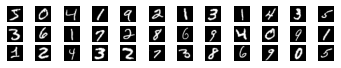

In [115]:
plt.figure(figsize=(6,1))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [56]:
model = Sequential()  # 딥러닝의 틀 역할 객체 생성

In [57]:
# 입력층
model.add(Dense(512,input_shape=(784,)))

In [58]:
# 히든층
model.add(Activation('relu'))

In [59]:
model.add(Dropout(0.2))

In [60]:
model.add(Dense(512))

In [61]:
model.add(Activation('relu'))

In [62]:
model.add(Dropout(0.2))

In [63]:
# 출력층
model.add(Dense(10))
model.add(Activation('softmax'))

In [64]:
# 모델 만들기
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [106]:
# 학습시키기
%time
hist = model.fit(X_train, y_train,
                 batch_size=255,
                 epochs=5,
                 verbose=1,
                 validation_data=(X_test, y_test))

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 11.9 µs
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 129us/step - loss: 0.0220 - accuracy: 0.9925 - val_loss: 0.0638 - val_accuracy: 0.9828
Epoch 2/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.0190 - accuracy: 0.9939 - val_loss: 0.0614 - val_accuracy: 0.9822
Epoch 3/5
60000/60000 [==============================] - 8s 128us/step - loss: 0.0183 - accuracy: 0.9937 - val_loss: 0.0623 - val_accuracy: 0.9824
Epoch 4/5
60000/60000 [==============================] - 8s 133us/step - loss: 0.0178 - accuracy: 0.9936 - val_loss: 0.0622 - val_accuracy: 0.9857
Epoch 5/5
60000/60000 [==============================] - 8s 125us/step - loss: 0.0154 - accuracy: 0.9948 - val_loss: 0.0624 - val_accuracy: 0.9855


In [66]:
# 검증하기
score = model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 73us/step


In [90]:
score

[0.06524108180672629, 0.9807000160217285]

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

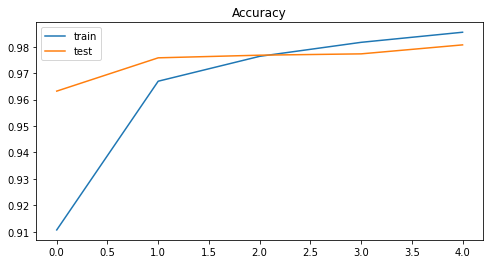

In [69]:
plt.figure(figsize=(8,4))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

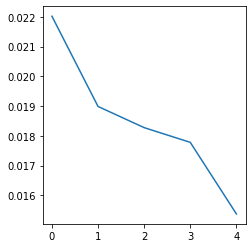

In [107]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.show()

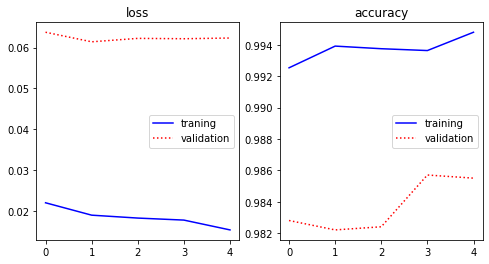

In [108]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(hist.history['loss'], 'b-', label='traning')
plt.plot(hist.history['val_loss'], 'r:', label='validation')
plt.title('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'], 'b-', label='training')
plt.plot(hist.history['val_accuracy'], 'r:', label='validation')
plt.title('accuracy')
plt.legend()

plt.show()

In [ ]:
plt.figure(figsize=(1,1))
plt.imshow(X_test[0,], cmap=plt.cm.bone_r)
plt.grid(False)
plt.axis("off")
plt.show()

In [109]:
hist.history

{'accuracy': [0.9925333, 0.9939167, 0.99375, 0.99363333, 0.9948],
 'loss': [0.02201836809411179,
  0.01898604445339879,
  0.01827449262351729,
  0.017779541581636294,
  0.015374386732262792],
 'val_accuracy': [0.9828000068664551,
  0.982200026512146,
  0.9824000000953674,
  0.9857000112533569,
  0.9854999780654907],
 'val_loss': [0.06376820811041034,
  0.06142839649573216,
  0.06226708525479421,
  0.06218054315050176,
  0.06235077507904771]}

In [110]:
model.predict_classes(X_test[:1,:], verbose=0)

array([7])

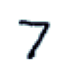

In [116]:
plt.figure(figsize=(1,1))
plt.imshow(X_test[0], cmap=plt.cm.bone_r)
plt.grid(False)
plt.axis("off")
plt.show()